In [1]:
import numpy as np
import emilys.image.shift as sh
import matplotlib.pyplot as plt
import emilys.image.arrayplot as aplt
%matplotlib inline

In [2]:
sworkdir = 'F:/Data/Measurements/PICO/STABILITY/300kV/200910/ser-1/'

In [3]:
sfpre = 'img_' # image name prefic
sfsuf = '.dat' # image name suffix
nimg0 = 1 # first image index
nimgn = 517 # last image index
nidx = 4 # number of digits used in the file name for an index
nbin = 4 # detector binning
dx = 0.0067257 * nbin # detector pixel size (x) [nm]
dy = 0.0067257 * nbin # detector pixel size (y) [nm]
dt = 0.211 # time per aquisition [s]
nx = 512 # number of pixels (x)
ny = 512 # number of pixels (y)
datatype = np.uint16

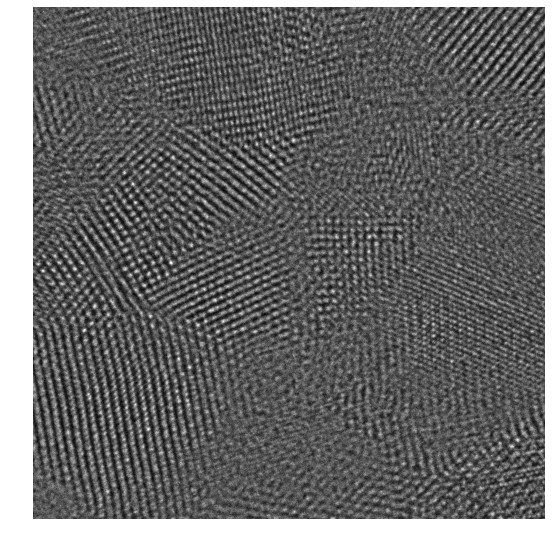

In [4]:
# load and show one example image
idx = 35
sfile = sworkdir + sfpre + '{:04d}'.format(idx) + sfsuf
aimg = np.fromfile(sfile, dtype=datatype).astype(np.float32).reshape((ny,nx))
paimg = aplt.arrayplot2d(aimg,1)

In [9]:
# load first image as first reference
idx = 1
sfile = sworkdir + sfpre + '{:04d}'.format(idx) + sfsuf
aref = np.fromfile(sfile, dtype=datatype).astype(np.float32).reshape((ny,nx))
# measure image-to-image shift in a series
ash = np.zeros((nimgn-nimg0+2,2))
idx = 0
for i in range(nimg0+1, 20+1):
    # load next image
    sfile = sworkdir + sfpre + '{:04d}'.format(i) + sfsuf
    aimg = np.fromfile(sfile, dtype=datatype).astype(np.float32).reshape((ny,nx))
    # measure the shift
    ash[idx] = sh.get_rigid_shift(aimg, aref, method='com', maxshift = 2.)
    print(idx, ash[idx])
    aref = aimg
    idx += 1

0 [0.02610426 0.07297672]
1 [-0.21958962  0.37660552]
2 [ 0.3904152  -0.46522809]
3 [ 0.26106776 -0.11640873]
4 [-0.01484336 -0.1473465 ]
5 [0.16495486 0.07292369]
6 [ 0.11301449 -0.15964435]
7 [ 0.06910454 -0.34609016]
8 [ 0.26707211 -0.03936842]
9 [-0.05734781 -0.13683416]
10 [-0.20440519  0.22506089]
11 [0.09858528 0.18247624]
12 [ 0.08203815 -0.02871185]
13 [-0.30155342 -0.03017412]
14 [ 0.4327602  -0.12168476]
15 [0.00878194 0.03373359]
16 [0.31006313 0.07713616]
17 [0.01010156 0.05631219]
18 [-0.05906153 -0.10008952]


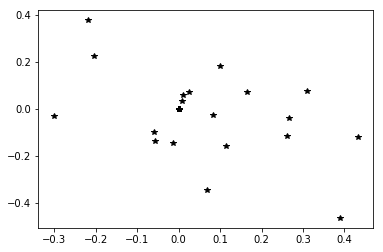

In [10]:
tash = ash.T
plt.plot(tash[0],tash[1],'k*')